In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import datasets
dataset = pd.read_csv('C:/Users/user/Downloads/petrol_consumption.csv')

In [3]:
dataset
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
X = pd.DataFrame(dataset.iloc[:, :-1])
y = pd.DataFrame(dataset.iloc[:, -1])

In [7]:
X.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
43,7.0,3745,2611,0.508
44,6.0,5215,2302,0.672
45,9.0,4476,3942,0.571
46,7.0,4296,4083,0.623
47,7.0,5002,9794,0.593


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1,max_depth=4)
classifier.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=4, n_estimators=20, random_state=1)

In [19]:
y_pred=classifier.predict(X_test)

In [21]:
feature_imp = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

Average_income                  0.301712
Paved_Highways                  0.282256
Population_Driver_licence(%)    0.258861
Petrol_tax                      0.157171
dtype: float64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

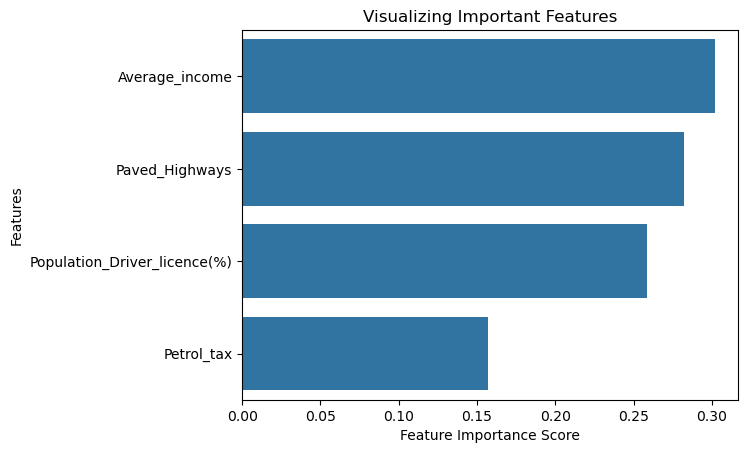

In [25]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest, 2), "%")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


100.0 %


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 163.2
Mean Squared Error: 43447.4
Root Mean Squared Error: 208.44039915525013


In [35]:
from sklearn.svm import SVC, LinearSVC

In [37]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [40]:
y_pred = linear_svc.predict(X_test)

In [48]:
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc, 2), "%")

5.26 %


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 102.3
Mean Squared Error: 16050.9
Root Mean Squared Error: 126.69214656007688


In [52]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

In [54]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd, 2), "%")


2.63 %


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 242.9
Mean Squared Error: 71790.9
Root Mean Squared Error: 267.9382391522345


In [58]:
from sklearn.linear_model import Perceptron


In [60]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron, 2), "%")


7.89 %


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 79.9
Mean Squared Error: 12780.1
Root Mean Squared Error: 113.0491043750458


In [64]:
from sklearn.linear_model import LogisticRegression


In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log, 2), "%")


21.05 %


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 135.5
Mean Squared Error: 28889.3
Root Mean Squared Error: 169.96852649829026


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
from sklearn import metrics
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree, 2), "%")

100.0 %


In [75]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 77.0
Mean Squared Error: 15936.2
Root Mean Squared Error: 126.23866285730375


In [87]:
from sklearn.naive_bayes import GaussianNB

In [101]:
# 将 y_train 转换为 1D 数组
y_train = y_train.values.ravel()

In [105]:
y_pred = gaussian.predict(X_test)

In [109]:
gaussian = GaussianNB()

In [111]:
gaussian.fit(X_train, y_train)

GaussianNB()

In [113]:
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian, 2), "%")

97.37 %


In [115]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 82.5
Mean Squared Error: 15562.5
Root Mean Squared Error: 124.7497494987465


In [131]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                 'Random Forest', 'Naive Bayes', 'Perceptron', 
                 'Stochastic Gradient Decent', 
                 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
                 acc_random_forest, acc_gaussian, acc_perceptron, 
                 acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
print(result_df.head(8))

                        Model   Score
3               Random Forest  100.00
7               Decision Tree  100.00
4                 Naive Bayes   97.37
2         Logistic Regression   21.05
5                  Perceptron    7.89
0     Support Vector Machines    5.26
6  Stochastic Gradient Decent    2.63
1                         KNN    0.82


In [137]:
acc_knn = 33

C:\Users\user\AppData\Local\Temp\ipykernel_5132\2873535959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x="Model", y="Score", data=bestmodelgraph, palette="Blues_d", aspect=3.2, kind="bar")


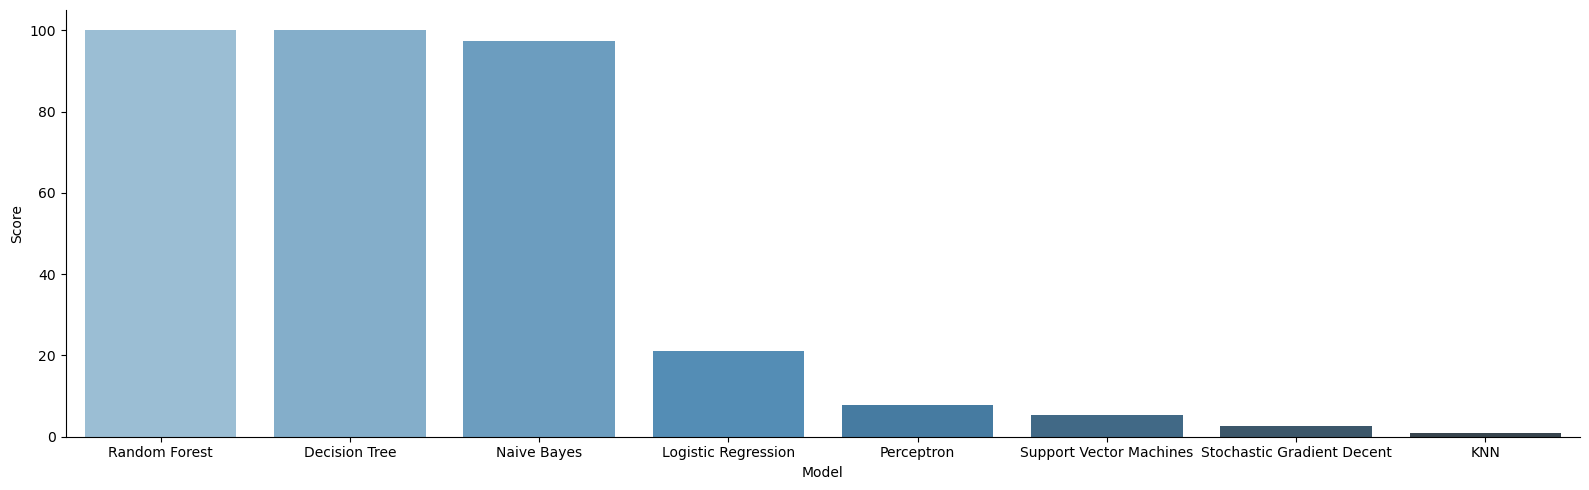

In [139]:
import seaborn as sns

bestmodelgraph = result_df.head(8)
ax = sns.catplot(x="Model", y="Score", data=bestmodelgraph, palette="Blues_d", aspect=3.2, kind="bar")
